# ExtraaLearn Project



## Context



The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective



ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert




## Methodology and Approach

1. Perform some ***basic data analysis and exploratory analysis***.
2. Decide the ***models that will be used***.
  - Supervised - Classification
  - Supervised - Regression
  - Unsupervised
3. Define which ***metrics will be used*** to judge model performance.
4. Perform ***model data pre-processing and prepration***.
  - Data Cleansing (missing, duplicates, etc..)
  - Feature Engineering
  - Split data into training, test/validation datasets
5. ***Train models***.
  - For each model type:
    - First use *default parameters*, then score against the test/validation dataset.
    - Then, perform *hyper-parameter tuning* to find the best parameters, retrain and rescore.
    - Select the best parameter set for each model.
6. Select the ***best model*** based on the metrics you have defined
7. Give the observations / feedback / recommendations

## Data Description



The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.gridspec as gridspec
import math

import warnings
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build models for prediction
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from joblib import parallel_backend
    
# To encode categorical variables
from sklearn.preprocessing import LabelEncoder

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, make_scorer, recall_score, roc_curve, auc, accuracy_score

# Import system 
import sys

## Import helper functions to be used later

In [3]:
# Append the directory to your python path using sys
sys.path.append('../utilities')

# Import the utils.py file
import utils

In [5]:
# Read the dataset file
data = pd.read_csv('../datasets/ExtraaLearn.csv')

In [6]:
# Copying data to another variable to avoid any changes to original data
same_data = data.copy()

## Data Overview



- Observations
- Sanity checks

In [7]:
# View the first 5 rows of the dataset
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [8]:
# Understand the shape of the data
data.shape

(4612, 15)

**Observations**
- The data has **4612 rows and 15 columns.**

In [9]:
# Checking the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

**Observations**
- The columns **age, website_visits, time_spent_on_website, page_views_per_visit and status** are numeric datatype, while the rest are object datatype.
- There are **no null values.**
- The **ID** column is a unique identifier to lead and will be of any value in the analysis, so we will drop it.
- The **status** column is our target variable.


In [10]:
#check for duplicate values
print('Before ID drop: ', data.duplicated().sum())

# Dropping patientid from the data as it is an identifier and will not add value to the analysis
data=data.drop(columns=["ID"])

#check for duplicate values
print('After ID drop: ',data.duplicated().sum())

#drop duplicates
data = data.drop_duplicates()
print('After duplicate removal: ',data.duplicated().sum())

Before ID drop:  0
After ID drop:  14
After duplicate removal:  0


**Observations**

- There are no duplicate rows before the ID was dropped, indicating no real duplicates.
- There are 14 duplicates after the ID was dropped, so those duplicates will no be cleaned or dropped.

In [11]:
# Checking the descriptive statistics of the columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4598.0,46.179208,13.160811,18.0,36.00,51.000,57.000,63.000
website_visits,4598.0,3.577642,2.826572,0.0,2.00,3.000,5.000,30.000
time_spent_on_website,4598.0,726.215746,743.884963,0.0,155.25,377.500,1341.750,2537.000
page_views_per_visit,4598.0,3.035339,1.964011,0.0,2.08,2.809,3.759,18.434
status,4598.0,0.299043,0.457889,0.0,0.00,0.000,1.000,1.000


**Observations**
- The average age for a lead is 46 years, the youngest is 18, and oldest 63 respectively.
- The leads on average visit the website 3.5 times is we round up, but up to as many as 30.
- The average time spent on the website is 726.
- The average page_views is 3.

- I think it will be interesting to see if the time spent on the website is correlated to the page views. It might give us some insight if leads are actively clicking around or sitting on one page.


## Exploratory Data Analysis (EDA)

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

**These questions will be answered in the below analysis**

### **Univariate Analysis**

- For category columns, we will look at value counts for leads as a whole.
- For numerical columns, we will look at ditributions for lead as a whole.

#### Check our target variable for balance

There are various degrees of imbalance, and what is considered imbalanced can depend on the specific problem, the total size of the dataset, and the number of classes involved. Here are some general guidelines to understand when a dataset is considered imbalanced:

**Minor Imbalance:** This is when the class distribution is slightly off from being equal but not to a degree that severely impacts model performance. An example could be a binary classification problem with a class distribution of 60% for one class and 40% for the other.

**Moderate Imbalance**: Here, the imbalance starts to become more pronounced. For instance, in a binary classification problem, a distribution of 70% for one class and 30% for the other might be considered moderately imbalanced.

**Severe Imbalance:** This is when the class distribution is highly skewed, making one class significantly underrepresented. An example would be having 90% of the data belonging to one class and only 10% to the other in a binary classification scenario.

The specific threshold at which an imbalance becomes problematic varies, but generally, datasets where one class represents less than 20% of the total can start to introduce significant challenges for many standard machine learning models. These challenges include the model's tendency to overpredict the majority class, as doing so can still achieve high accuracy despite poor minority class performance.

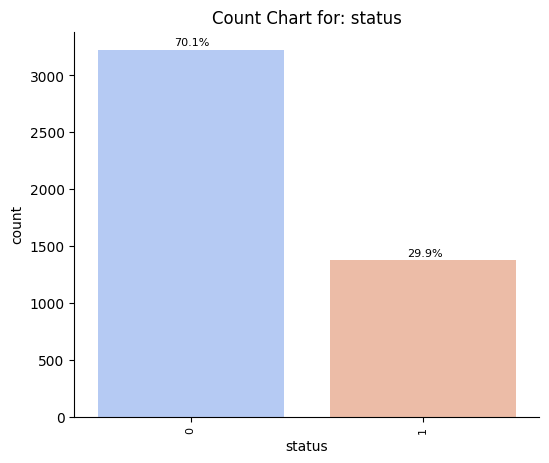

In [12]:
utils.bar_perc(data, 'status', figsize=[6,5])

This dataset is ***moderately imbalanced***. We will need to see if there are model differences setting class weights, or use the default.

#### Category Columns

In [13]:
# Saving column names with 'object' datatype to a list - can be used later in EDA
cat_col = data.select_dtypes(include=['object']).columns.tolist()

**Counts**

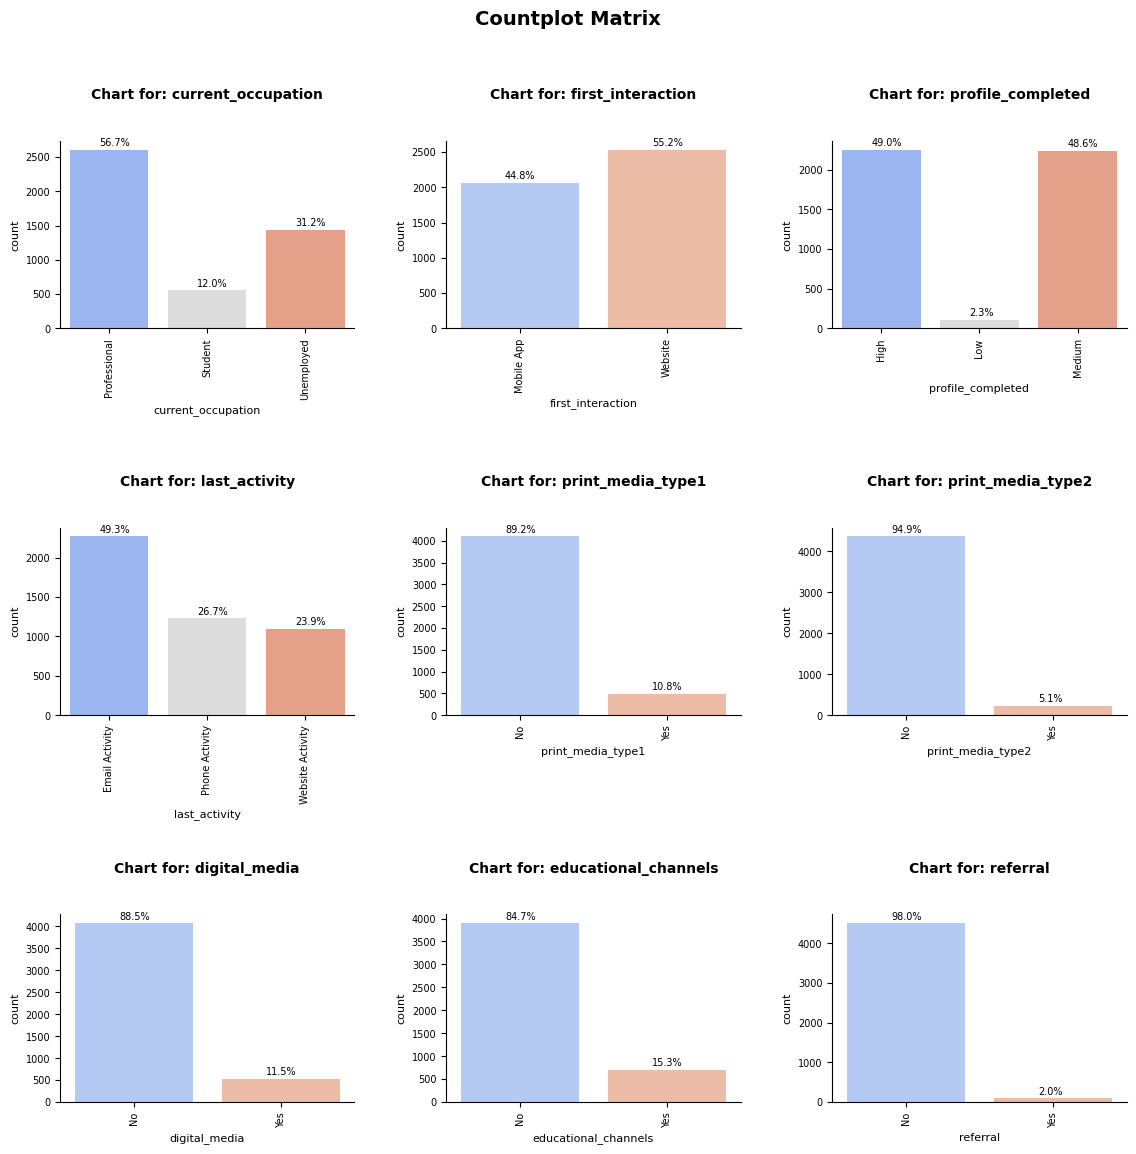

In [14]:
utils.countplot_grid(data=data, cols=cat_col)

**Observations**
- About 56% of the leads are professionals, the rest are unemployed or students.
- A good split of data at 55% for website as the first interaction.
- a very small percentage have a low profile completion 2.3% the medium and high are evenly split. (May need to watch out this low percentage)
- Print media 1 one looks un-balanced as 89% are No.
- Print media 2 has the same trend with 94% are No.
- Digital media is un-balanced as well with 88% are No.
- The same trnd for education channels at 85% No respectively.
- Highly un-balanced with referrals at 97% being No.

#### Numerical Columns

In [15]:
# Saving column names with 'int', float datatype to a list - used later in EDA
num_col = data.select_dtypes(include=['int64','float64']).columns.tolist()

**Distributions**

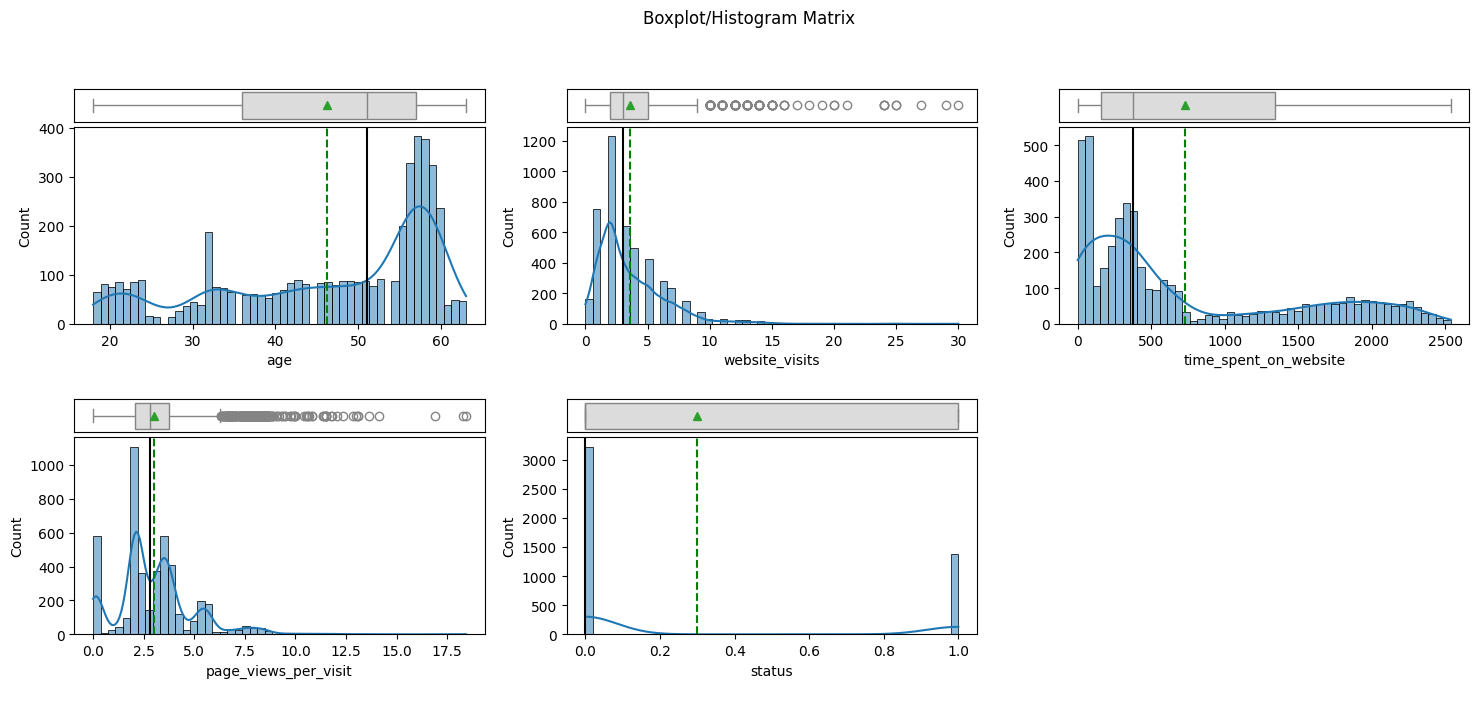

In [16]:
utils.histogram_boxplot_grid(num_col, data, 3)

**Observations**
- *age*
  - The age is skewed left.
  - The number of leads with ages between 18-53 is pretty much uniform.
  - The mean and median do not tell the story as a real "normal" distribution is centered around ~57.
- *website_visits*
  - Skewed right, it has outliers.
- *page_views_per_visits*
  - Multimodal, skewed to the right, it has outliers.
- *status*
  - As expected, boolean.

### **Bi-Variate Analysis**

#### **Category columns**




#### **Distribution Statistical Testing**

1. We will look at **distributions and perform hypothesis tests** (Anova, Kruswal-Wallace, etc..), to determine if there are differences in the categories for each numerical value. We will also plot the **boxplots for where the distributions are statistically different**.

  - For the hypothesis testing we will use the following setup:
    - H<sub>o</sub> = the distributions are the same
    - H<sub>a</sub> = the distrubtions are not the same
    - $\alpha$ = .05 


  If the p-value of the test is less than $\alpha$ then we can reject the H<sub>o</sub> and declare the distrubutions are different.

2. We will also look at **count plots for the label, target variable** ***'status'*** as it is a boolen value and distrubtions do not always show something.

In [17]:
newdf = utils.distribution_check(data, num_col, cat_col)

# create a dataframe for the distributions that are different
boxplotdf = newdf[newdf['is_different'] == True].reset_index(drop=True)

#print the result of the data frame
boxplotdf

,num_column,cat_column,num_categories,stat_test,stat_val,p_val,is_different
0,age,current_occupation,3,Kruskal-Wallis,1.478454e+03,0.000000e+00,True
1,website_visits,first_interaction,2,Mann-Whitney U Test,2.757368e+06,1.214298e-03,True
2,time_spent_on_website,profile_completed,3,Kruskal-Wallis,3.086846e+01,1.981524e-07,True
3,time_spent_on_website,digital_media,2,Mann-Whitney U Test,1.005806e+06,1.963750e-02,True
4,time_spent_on_website,educational_channels,2,Mann-Whitney U Test,1.447540e+06,1.773852e-02,True
5,time_spent_on_website,referral,2,Mann-Whitney U Test,1.649060e+05,4.350027e-04,True
6,page_views_per_visit,last_activity,3,Kruskal-Wallis,8.273391e+00,1.597556e-02,True
7,status,current_occupation,3,Kruskal-Wallis,1.339803e+02,8.063788e-30,True
8,status,first_interaction,2,Mann-Whitney U Test,1.698173e+06,6.018479e-147,True
9,status,profile_completed,3,Kruskal-Wallis,3.082014e+02,1.188266e-67,True


##### **Boxplots**

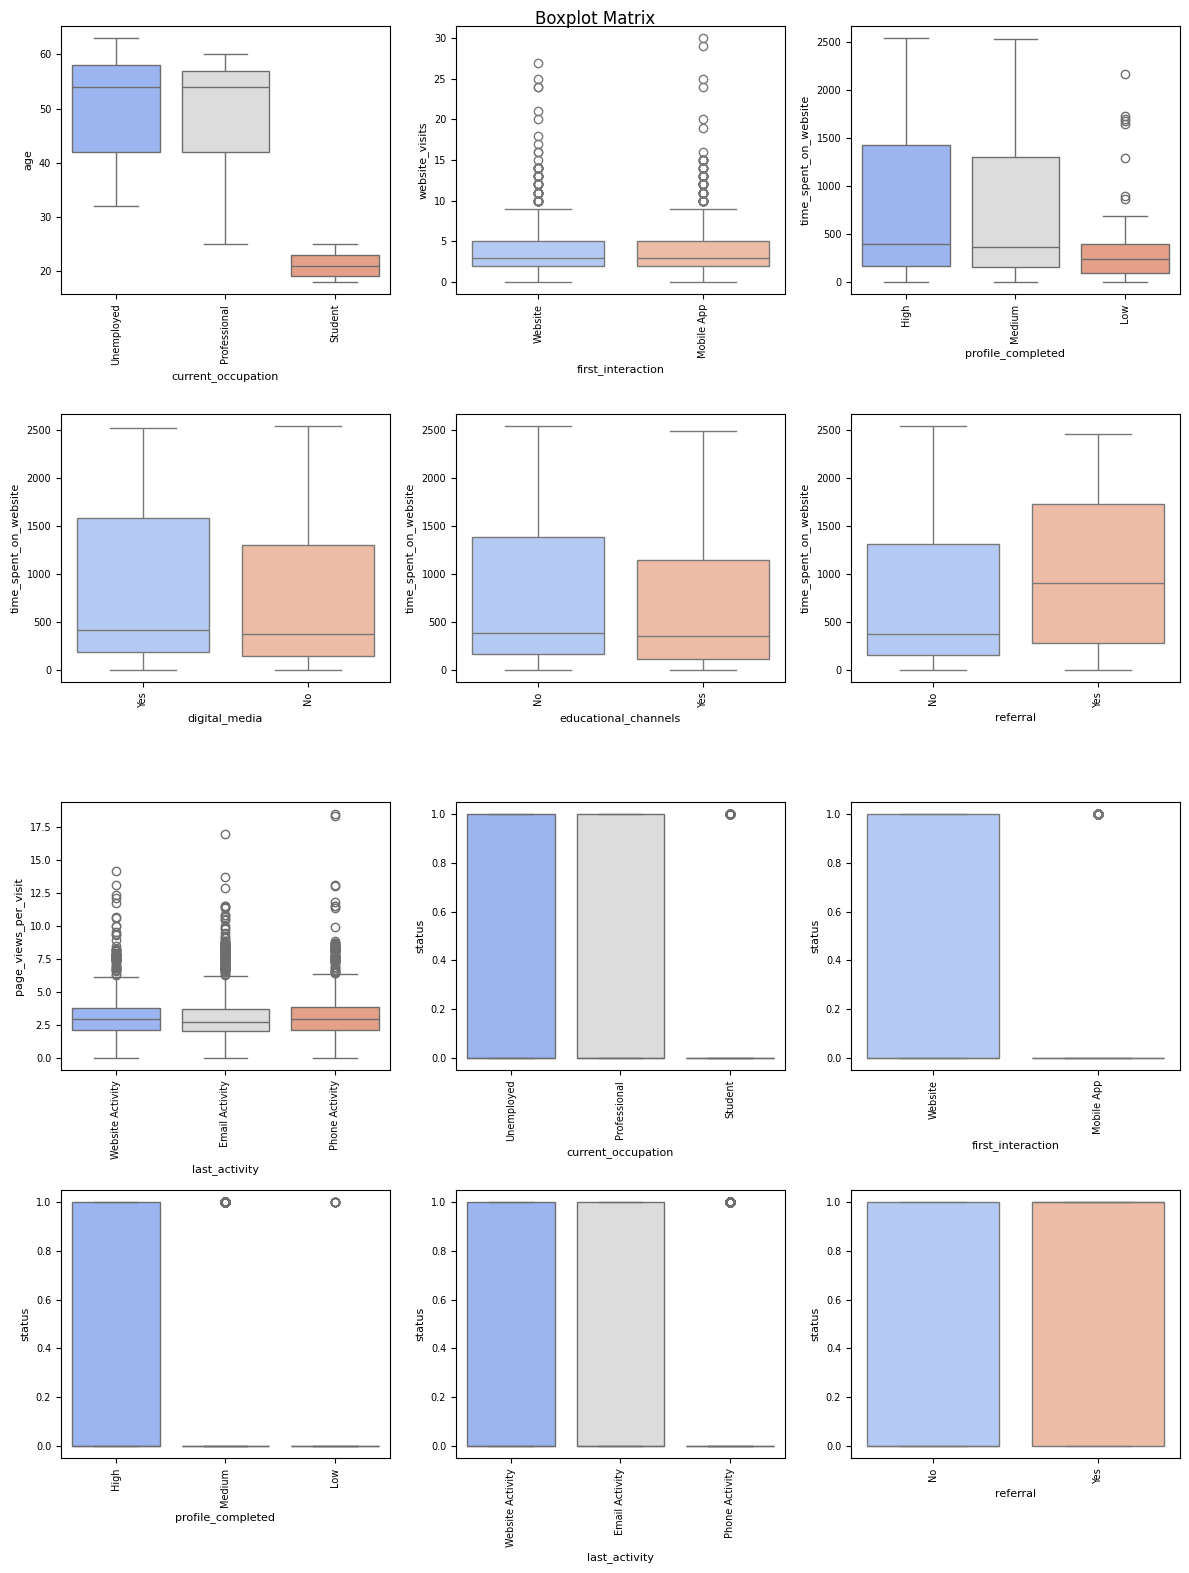

In [18]:
# columns to keep in teh dataframe to be passed to the boxplot grid
columns_to_keep = ['num_column', 'cat_column']

# Create a new DataFrame with only the specified columns
plotdf = boxplotdf[columns_to_keep].reset_index(drop=True)

#Create the boxplot grid (dataframe to indicate whoch columns to plot, the data in which to be plotted)
utils.boxplot_grid(plotdf, data)

**Obervations**
- ***age***
  - *current_occpation:* shows a difference as expected, the students are younger
- ***website_visits***
  - *first_interaction:* Shows a difference in the number of outliers.
- ***time_spent_on_website***
  - *profile_completed:* shows a difference on the Low profile completed, that also has some outliers.	
  - *digital_media:* shows a smaller Q3 value, indicating the distribution is tighter.
  - *educational_channel:* shows a smaller Q3 value, indicating the distribution is tighter.
  - *referral:* shows a lower tighter distribution
- ***page_views_per_visit***
  - *last_activity:* show similorat distrubutions but difference in outliers.
- ***status***
  - *current_occupation:* shows a difference for student, indicating not many students are converted from a lead to a customer.
  - *first_interaction:* shows a difference for mobile_app, indicating not many leads are converted to a customer from the mobile app.
  - *profile_completed:* shows that mostly high profile completion has a better lead conversion.
  - *last_activity:* not many lead conversions from Phone activity
  - *referral:* No visibile difference from this plot.

#### **Correlation Study**

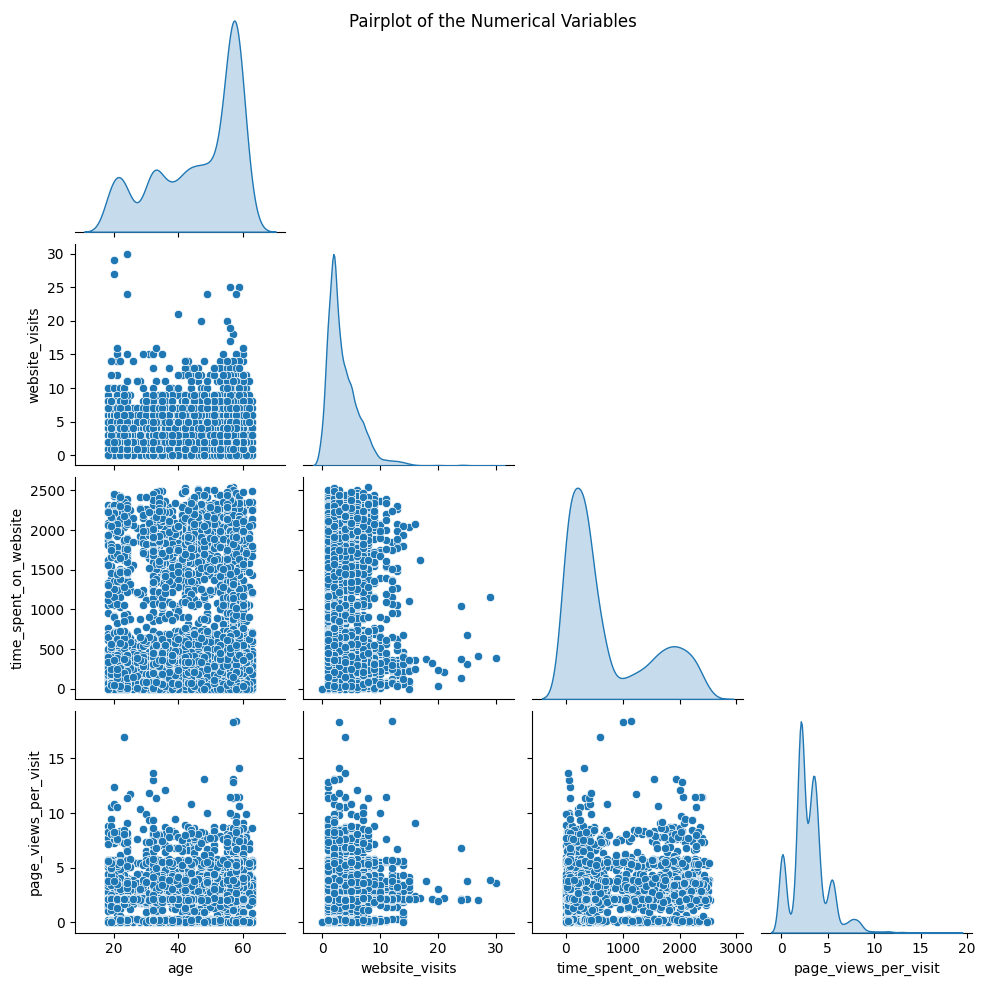

In [19]:
# use a pair plot to look at the distrubution and the correlation between the numeric variables
utils.pplot(data, num_col[:-1]) # <- Dont include the status column as it is boolean

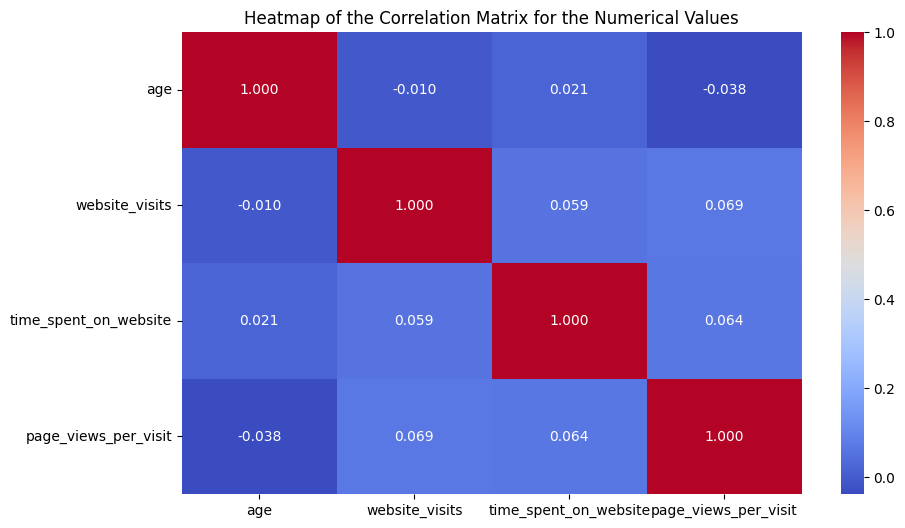

In [20]:
#create a correlation matrix and plot it
utils.corr_matrix(data[num_col[:-1]])

**Observations**
- No correaltions between the numeric variables.

#### **Count Plots for Target Variable**

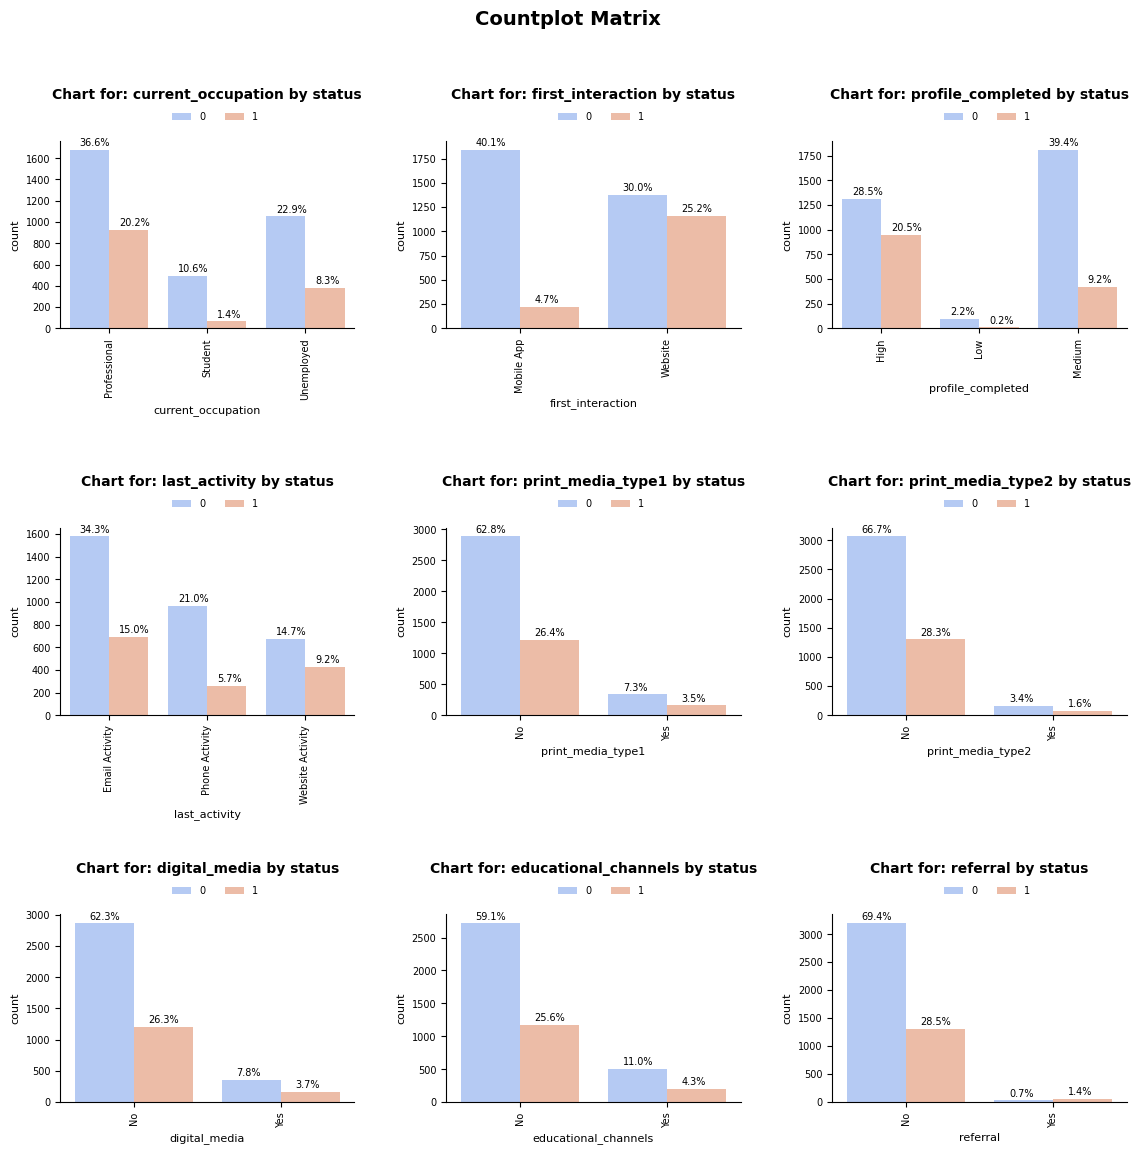

In [21]:
utils.countplot_grid(data, cat_col, hue=True, var='status')

**Observations**
- *current_occupation*
  - Professionals have the highest lead conversion rate at 20.2% while Students have the least at 1.4%
- *first_interaction*
  - Website has the highest lead conversion rate at 25.2% and is almost the same rate as non-conversions on the Website. Meaning leads that first interact on the Website sign-up about 45% of the time.
- *profile_completed*
  - Of the leads that have a complete their profile in the "high" category convert at a 42% rate.

No particular impact seen on media types, educational channels aor referrals for the "No" category.

**Let's Answer the Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
   - Students have very little impact on lead's status, Professionals and Unemployed have the most conversions. 
  
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
   - Yes, the first interaction from the website has the biggest impact, about 45% convert.
   
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
   - 25% of the 30% of the converted leads come from Website and Email last_activity types.
   
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
   -  Education channels have the conversion rate at 4.3%
     
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?
   - Yes, leads that have a more complete profile tend to convert at a higher rate. Medium at 9% then more than double for High at 20%

## Selecting Models

For a supervised classification use case, there are numerous algorithms you can use, each with its own strengths and suitability for different kinds of data and problem complexities. Here's a list of commonly used classification algorithms along with a brief description of each:

1. **Logistic Regression**
  - Type: Linear model
  - Use Case: Binary or multinomial classification
  - Pros: Simple, interpretable, fast
  - Cons: Assumes linear decision boundaries, not suitable for complex relationships
2. **Decision Trees**
  - Type: Tree-based model
  - Use Case: Binary or multiclass classification
  - Pros: Easy to interpret, can handle non-linear data
  - Cons: Prone to overfitting
3. **Random Forest**
  - Type: Ensemble of Decision Trees
  - Use Case: Binary or multiclass classification
  - Pros: Handles overfitting better than individual decision trees, good performance
  - Cons: Less interpretable due to ensemble nature
4. **Gradient Boosting Machines (GBM)**
  - Type: Ensemble of weak prediction models (often decision trees)
  - Use Case: Binary or multiclass classification
  - Pros: Often provides high accuracy, can handle various types of data
  - Cons: Can be slow to train, prone to overfitting if not tuned properly
5. **Support Vector Machines (SVM)**
  - Type: Based on the concept of decision planes
  - Use Case: Binary classification, but can be extended to multiclass
  - Pros: Effective in high-dimensional spaces
  - Cons: Memory-intensive, not suitable for large datasets
6. **K-Nearest Neighbors (KNN)**
  - Type: Instance-based learning
  - Use Case: Binary or multiclass classification
  - Pros: Simple, effective, non-parametric
  - Cons: Slow with large datasets, sensitive to irrelevant features
7. **Naive Bayes**
  - Type: Probabilistic model based on applying Bayes' theorem
  - Use Case: Text classification (e.g., spam detection), binary or multiclass classification
  - Pros: Fast, suitable for high-dimensional data
  - Cons: Assumes independence between predictors
8. **AdaBoost**
  - Type: Ensemble method that combines multiple weak classifiers to create a strong classifier
  - Use Case: Binary or multiclass classification
  - Pros: Simple to implement, often provides good results
  - Cons: Sensitive to noisy data and outliers
9. **XGBoost**
  - Type: An optimized distributed gradient boosting library
  - Use Case: Binary or multiclass classification
  - Pros: Fast, efficient, and often outperforms other algorithms
  - Cons: Can be complex to tune, prone to overfitting if not carefully regulated


***Choosing the Right Algorithm***

The choice of algorithm depends on several factors, including:

Data size, quality, and nature: Some algorithms work better with large or high-dimensional datasets, while others are suited for smaller datasets.

Complexity of the task: For linear relationships, simpler models like logistic regression may suffice. For complex relationships, ensemble methods or neural networks might be more appropriate.

Performance requirements: If interpretability is key, decision trees or logistic regression might be preferred. If the highest accuracy is the goal, more complex models like gradient boosting machines or neural networks could be better choices.

Computational resources: Some algorithms, especially neural networks and ensemble methods, require significant computational power and training time.

It's often beneficial to experiment with multiple algorithms and perform cross-validation to determine which algorithm performs best for your specific use case.

**Model Selection:**

Since this particular dataset is relatively small and it needs to be somewhat exaplainable we will choose the following algorithms for our project:
1. Decision Tree
2. Random Forest
3. AdaBoost
4. Gradient Boost

## Selecting Metrics

For balanced datasets, accuracy might suffice, but for imbalanced datasets, precision, recall, F1 score, or ROC-AUC might be more appropriate. Similarly, if false positives and false negatives have different costs, precision and recall can provide more insights than accuracy alone.

1. ***Accuracy***: The proportion of true results (both true positives and true negatives) among the total number of cases examined. It's simple and intuitive but can be misleading for imbalanced classes.

2. ***Precision*** (Positive Predictive Value): The ratio of true positive results to all positive results, including those not identified correctly. It's important when the cost of a false positive is high.

3. ***Recall*** (Sensitivity or True Positive Rate): The ratio of true positive results to all actual positives. It's crucial when the cost of a false negative is high.

4. ***F1 Score***: The harmonic mean of precision and recall, providing a balance between the two metrics. It's useful when you need a single metric to compare models directly, especially in imbalanced classes.

5. ***Confusion Matrix***: A table laying out the performance of a classification model. Although not a metric, it provides insight into the types of errors made by the model.

6. ***ROC-AUC*** (Receiver Operating Characteristic - Area Under Curve): This metric is used to compare the model's true positive rate to its false positive rate at various thresholds. The AUC represents a model's ability to discriminate between positive and negative classes. An AUC of 1 indicates a perfect model; an AUC of 0.5 suggests no discriminative power.

**Metrics choosen:**
- We will choose to ***optimize our models on Recall***, while trying to maintain a competitive accuracy. A higher cost is incurred when we miss on potential lead conversions.

In [22]:
# set the scoring method used by all algorigthms in GridSearchCV
optimize_on = recall_score

## Data Pre-processing and Preparation



1. There are no missing values. So no treatment is needed.
2. No feature engineering is needed.
3. Outlier detection and treatment.
   - There are outliers, however they are part of the distribution and are not measurement error. Also, the models choosen are very robust against outliers.

## Data Preparation for Model Building



- Before we proceed to build a model, we'll have to encode categorical features.
- Separate the independent variables and dependent Variables.
- We'll split the data into train and test to be able to evaluate the model that we train on the training data.

In [23]:
# Creating dummy variables for the categorical columns
# drop_first=True is used to avoid redundant variables
data_encoded = pd.get_dummies(
    data,
    columns = data.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True,
)

In [24]:
# Separating independent variables and the target variable
x = data_encoded.drop('status', axis=1)
y = data_encoded['status']

In [25]:
# Splitting the dataset into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1, stratify = y )

In [26]:
# Checking the shape of the train and test data
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)

Shape of Training set :  (3218, 16)
Shape of test set :  (1380, 16)


## Building a Decision Tree model

In [27]:
# since this is the first model scoring we need to clear any existing metrics already built
utils.delete_dataframe_if_exists('dfmr')

dfmr DataFrame does not exist.


In [30]:
# Decision Tree Classifier
dt =  DecisionTreeClassifier(random_state = 1)

In [31]:
# Fitting the model
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

              Model  Precision  Recall  F1-Score  Accuracy  ROC-AUC
DTree - TRN Default        1.0 0.99896   0.99948  0.999689      1.0



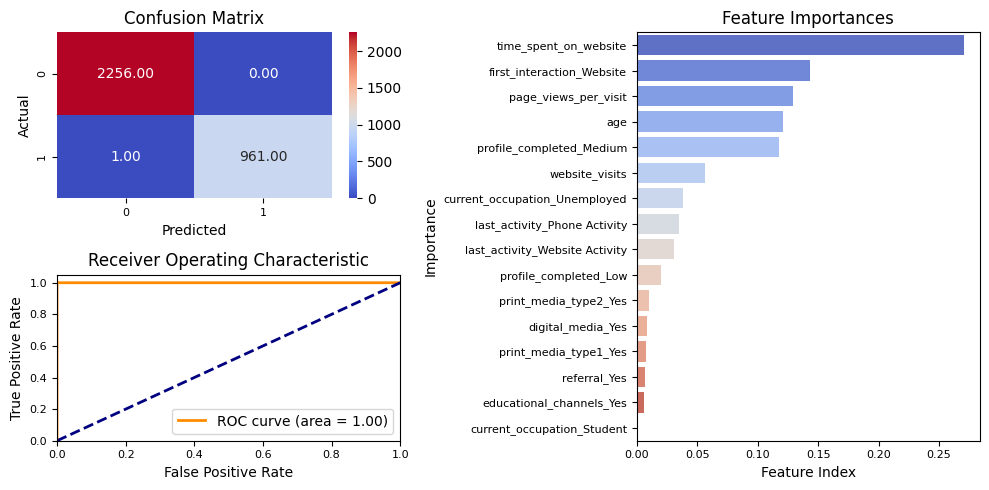

In [32]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(x_train)

# Score the data
ds = utils.evaluate_classification_metrics('DTree - TRN Default', y_train, y_train_pred_dt, x_train, dt)

              Model  Precision  Recall  F1-Score  Accuracy  ROC-AUC
DTree - TST Default   0.659472 0.66586  0.662651  0.797101 0.759334



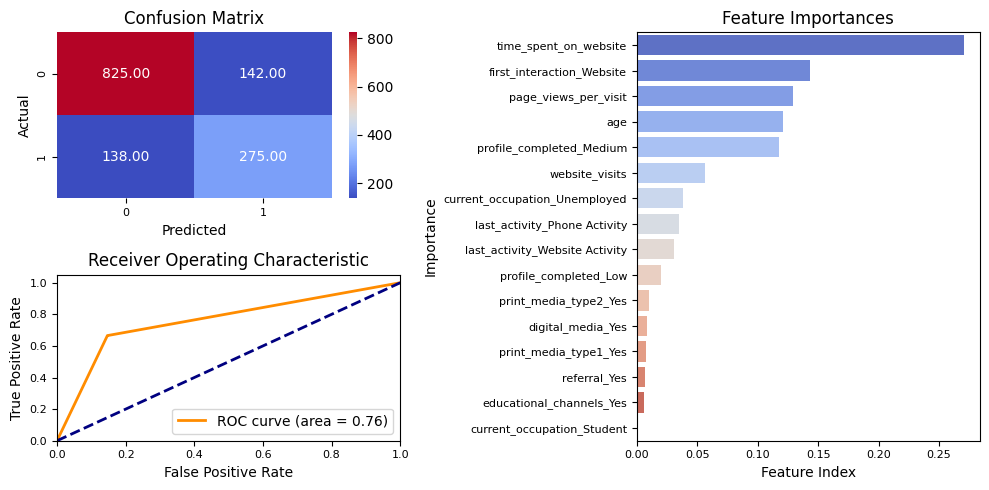

In [33]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(x_test)
ds = utils.evaluate_classification_metrics('DTree - TST Default', y_test, y_test_pred_dt, x_test, dt)

**Observations**
- The model is clearly overfitting on the train set since the recall is 1 on the train set and 0.65 in the test set.
- Furthermore, the model suggests that there's a 35% chance that a person who will become a paying customer is not detected as such. Therefore, if ExtraaLearn does not approach this person, they might lose a client.
- The model identifies the time spent on the website, the first interaction being the website and profile completion as medium as the most important features.

## Decision Tree Parameter Hyper-Tuning

In [34]:
with parallel_backend(backend='multiprocessing', n_jobs=-1):

    # Choose the type of classifier
    #dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.30, 1: 0.70}, random_state = 1)
    dtree_estimator = DecisionTreeClassifier(random_state = 1)
    # Grid of parameters to choose from
    parameters = {
        "max_depth": np.arange(2, 20),
        "criterion": ['gini', 'entropy'],
        "min_samples_leaf": [2, 5, 10, 15, 20],
        "max_leaf_nodes": [50, 75, 150, 250],
        "min_samples_split": [10, 30, 50, 70],
    }

    # Type of scoring used to compare parameter combinations
    scorer = metrics.make_scorer(optimize_on, greater_is_better=True)
    
    # Run the grid search
    gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 5)

    # Fitting the grid search on the train data
    gridCV = gridCV.fit(x_train, y_train)

    # Set the classifier to the best combination of parameters
    dtree_estimator = gridCV.best_estimator_

In [35]:
# Fit the best estimator to the data
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=50, min_samples_leaf=15,
                       min_samples_split=10, random_state=1)

            Model  Precision   Recall  F1-Score  Accuracy  ROC-AUC
DTree - TRN Tuned   0.702391 0.824324  0.758489   0.84307 0.910712



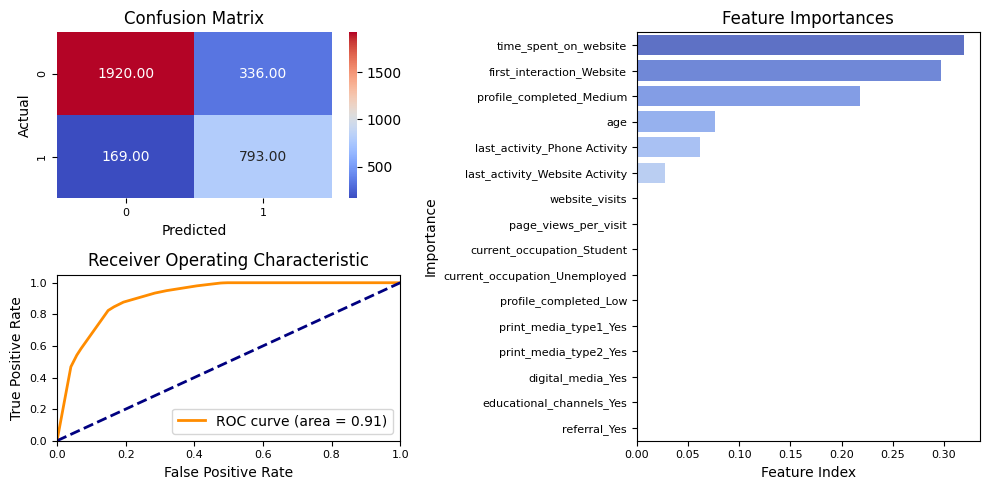

In [36]:
# Checking performance on the training dataset
y_train_pred_dt = dtree_estimator.predict(x_train)

#metrics_score('Decision Tree - Training Tuned', y_train, y_train_pred_dt)
ds = utils.evaluate_classification_metrics('DTree - TRN Tuned', y_train, y_train_pred_dt, x_train, dtree_estimator)

            Model  Precision   Recall  F1-Score  Accuracy  ROC-AUC
DTree - TST Tuned   0.684739 0.825666  0.748628  0.834058 0.906397



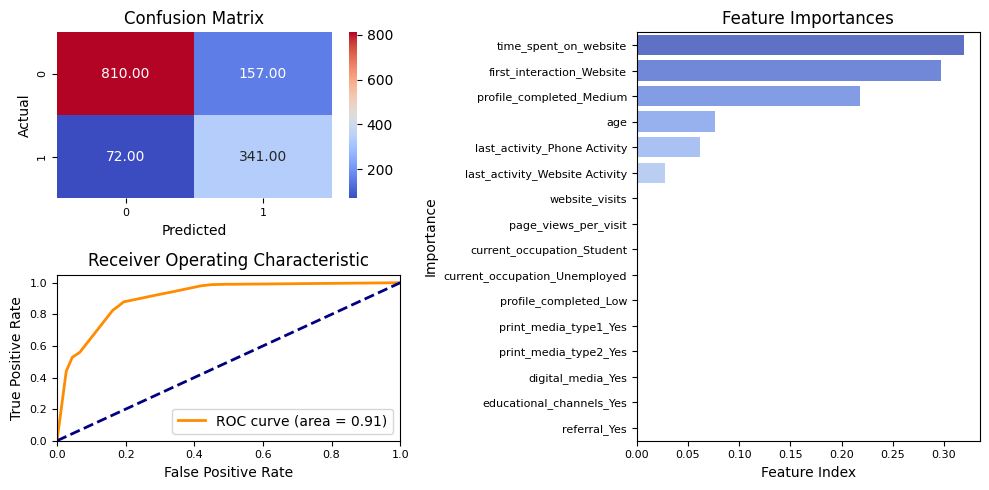

In [37]:
# Checking performance on the test dataset
y_test_pred_dt = dtree_estimator.predict(x_test)

#metrics_score('Decision Tree - Test Tuned', y_test, y_test_pred_dt)
ds = utils.evaluate_classification_metrics('DTree - TST Tuned', y_test, y_test_pred_dt, x_test, dtree_estimator)

**Observations**
- This model does a much better job and does not overfit. The recall score is boosted to .825.
- Furthermore, the model suggests that there's a 17% chance that a person who will become a paying customer is not detected as such. Much lower than the default value.
- The model identifies the time spent on the website, the first interaction being the website and profile completion as medium as the most important features. Consistent with the default model.


## Building a Random Forest model

In [39]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(random_state = 1)

In [40]:
rf_estimator.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

                Model  Precision  Recall  F1-Score  Accuracy  ROC-AUC
RForest - TRN Default   0.998962     1.0  0.999481  0.999689      1.0



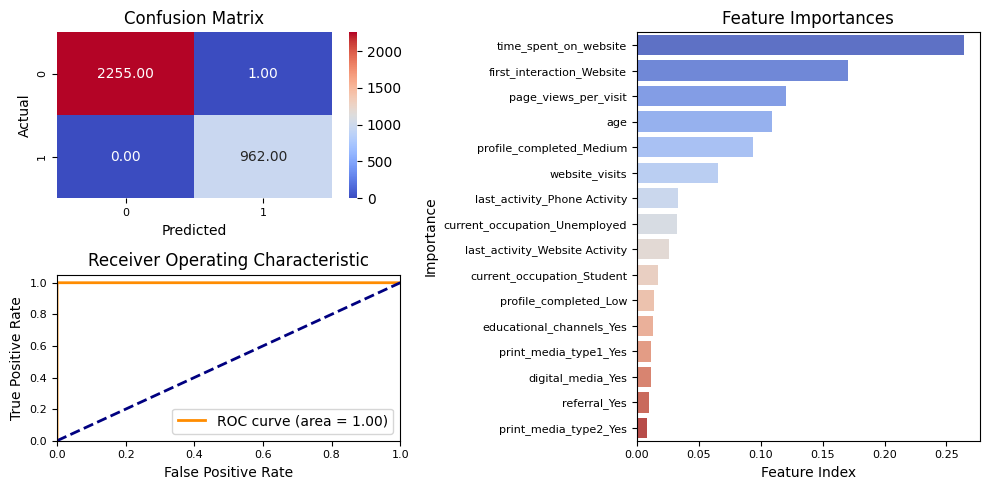

In [41]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(x_train)

#metrics_score('Random Forest - Training Default', y_train, y_pred_train_rf)
ds = utils.evaluate_classification_metrics('RForest - TRN Default', y_train, y_pred_train_rf, x_train, rf_estimator)

                Model  Precision   Recall  F1-Score  Accuracy  ROC-AUC
RForest - TST Default   0.771208 0.726392   0.74813  0.853623 0.914199



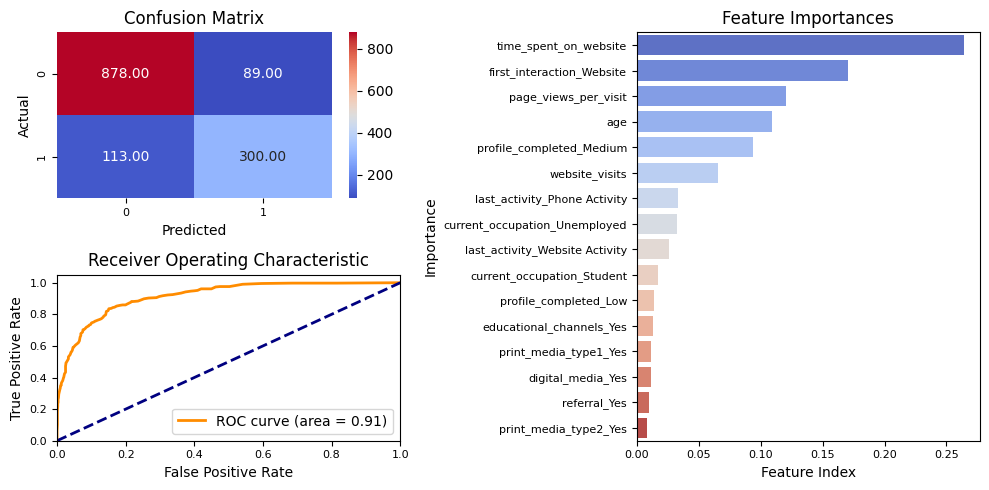

In [42]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(x_test)

#metrics_score('Random Forest - Test Default', y_test, y_pred_test_rf)
ds = utils.evaluate_classification_metrics('RForest - TST Default', y_test, y_pred_test_rf, x_test, rf_estimator)

**Observations**
- Like the Decision Tree default model, the Random Forest defaults overfit as well.
- It does do a fairly decent job on the test set with good accuracy and recall. 
- The model identifies the time spent on the website, the first interaction being the website and page views per visit as the top 3 most important features.

## Random Forest Parameter Hyper-Tuning

In [43]:
with parallel_backend(backend='multiprocessing', n_jobs=-1):
    # Choose the type of classifier
    rf_estimator_tuned = RandomForestClassifier(random_state = 1)
    # Grid of parameters to choose from
    params_rf = {
        "criterion": ['gini', 'entropy'],
        "class_weight": ["balanced",{0: 0.3, 1: 0.7}],
        'n_estimators': [25, 50, 100, 150],
        'max_depth': [3, 4, 5, 6],
        'max_leaf_nodes': [2, 3, 4],
    }

    # Type of scoring used to compare parameter combinations - recall score for class 1
    scorer = metrics.make_scorer(optimize_on, greater_is_better=True) 

    # Run the grid search
    grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

    grid_obj = grid_obj.fit(x_train, y_train)

    # Set the classifier to the best combination of parameters
    rf_estimator_tuned = grid_obj.best_estimator_

In [44]:
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, max_leaf_nodes=4, random_state=1)

              Model  Precision   Recall  F1-Score  Accuracy  ROC-AUC
RForest - TRN Tuned   0.662773 0.884615  0.757792  0.830951 0.909689



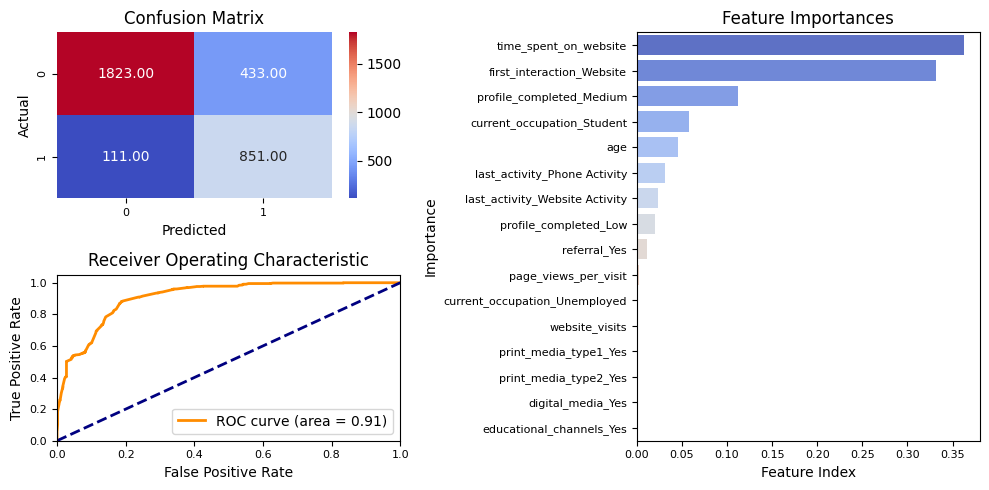

In [45]:
## Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)

#metrics_score('Random Forest - Training Tuned', y_train, y_pred_train_rf_tuned)
ds = utils.evaluate_classification_metrics('RForest - TRN Tuned', y_train, y_pred_train_rf_tuned, x_train, rf_estimator_tuned)

              Model  Precision   Recall  F1-Score  Accuracy  ROC-AUC
RForest - TST Tuned   0.663082 0.895884  0.762101  0.832609 0.911085



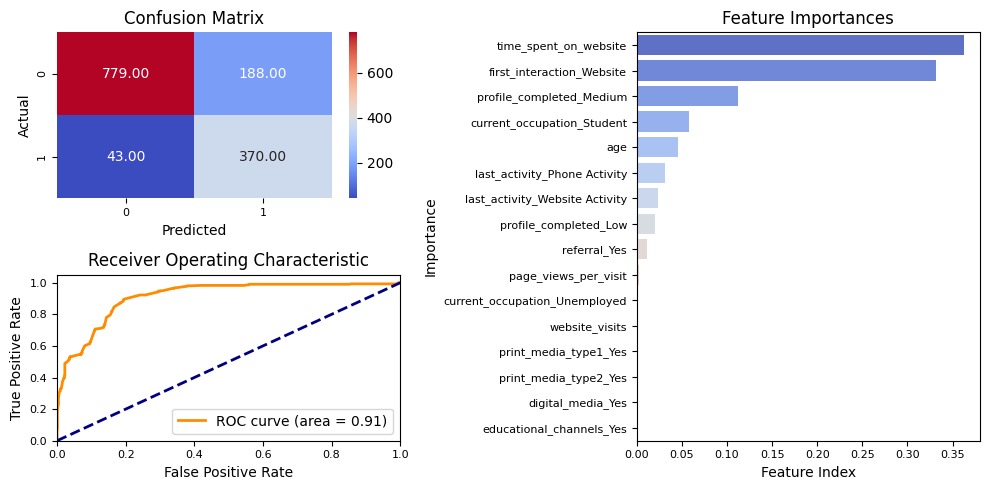

In [46]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test)

#metrics_score('Random Forest - Test Tuned', y_test, y_pred_test_rf_tuned)
ds = utils.evaluate_classification_metrics('RForest - TST Tuned', y_test, y_pred_test_rf_tuned, x_test, rf_estimator_tuned)

**Observations**
- The model does a great job with Recall at .895 with only 43 leads not predicted as a conversion. It does suffer a little bit on the Precision.
- It does do a fairly decent job on the test set with good accuracy as well. 
- The model identifies the time spent on the website, the first interaction being the website and  medium level of profile completed as the top 3 most important features.

## Building a AdaBoost model

In [47]:
# Fitting the Random Forest classifier on the training data
ada_estimator = AdaBoostClassifier(random_state = 1)

In [48]:
ada_estimator.fit(x_train, y_train)

AdaBoostClassifier(random_state=1)

               Model  Precision   Recall  F1-Score  Accuracy  ROC-AUC
ABoost - TRN Default   0.755344 0.661123    0.7051   0.83468 0.904247



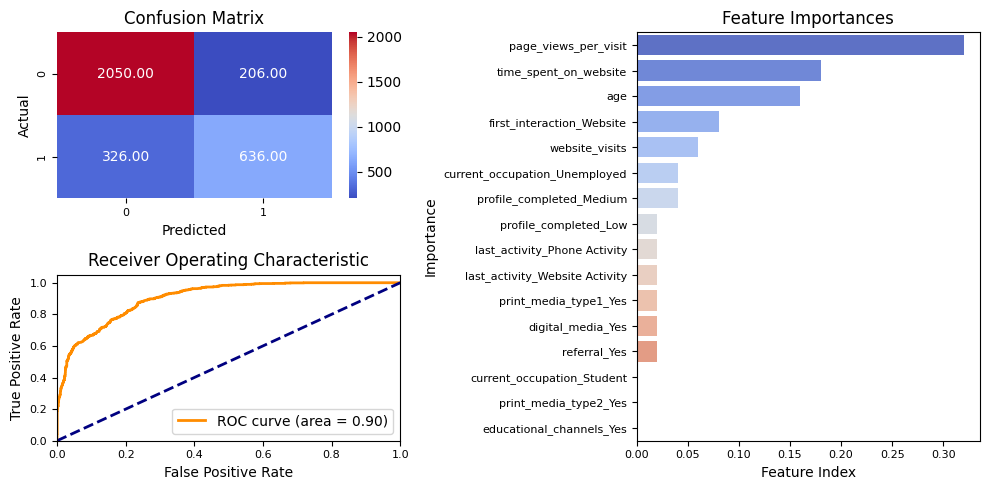

In [49]:
# Checking performance on the training data
y_pred_train_ada = ada_estimator.predict(x_train)

#metrics_score('Random Forest - Training Default', y_train, y_pred_train_rf)
ds = utils.evaluate_classification_metrics('ABoost - TRN Default', y_train, y_pred_train_ada, x_train, ada_estimator)

               Model  Precision   Recall  F1-Score  Accuracy  ROC-AUC
ABoost - TST Default   0.755102 0.627119  0.685185  0.827536 0.886126



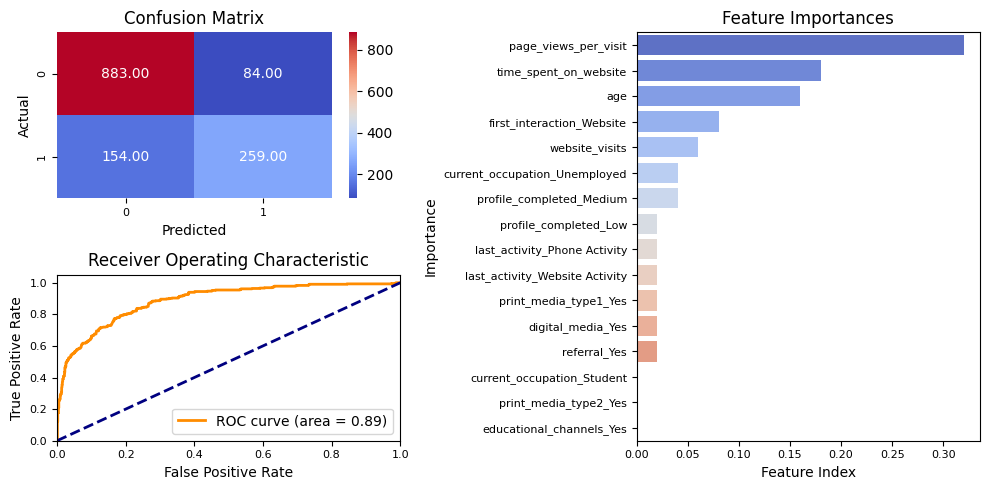

In [50]:
# Checking performance on the training data
y_pred_test_ada = ada_estimator.predict(x_test)

#metrics_score('Random Forest - Training Default', y_train, y_pred_train_rf)
ds = utils.evaluate_classification_metrics('ABoost - TST Default', y_test, y_pred_test_ada, x_test, ada_estimator)

**Observations**
- The model does a does not overfit, all metrics are similiar between the training and test set.
- It does not do a decent job on Recall. 
- The model identifies the page views per visit, time spent on the website, and age as the top 3 most important features.

## AdaBoost Parameter Hyper-Tuning

In [51]:
with parallel_backend(backend='multiprocessing', n_jobs=-1):
    
        # Choose the type of classifier
        ada_estimator_tuned = AdaBoostClassifier(random_state = 1, algorithm='SAMME')

        # Grid of parameters to choose from
        params_ada = {
                "n_estimators": [50, 250, 500, 750, 1000],
                "learning_rate" : [0.001, .01, .1, 1],
        }

        # Type of scoring used to compare parameter combinations
        scorer = metrics.make_scorer(optimize_on, greater_is_better=True )

        # Run the grid search
        grid_obj = GridSearchCV(ada_estimator_tuned, params_ada, scoring = scorer, cv = 5)

        grid_obj = grid_obj.fit(x_train, y_train)

        # Set the classifier to the best combination of parameters
        ada_estimator_tuned = grid_obj.best_estimator_

In [52]:
ada_estimator_tuned.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=1, n_estimators=1000,
                   random_state=1)

             Model  Precision   Recall  F1-Score  Accuracy  ROC-AUC
ABoost - TRN Tuned   0.754197 0.653846  0.700445  0.832815 0.903965



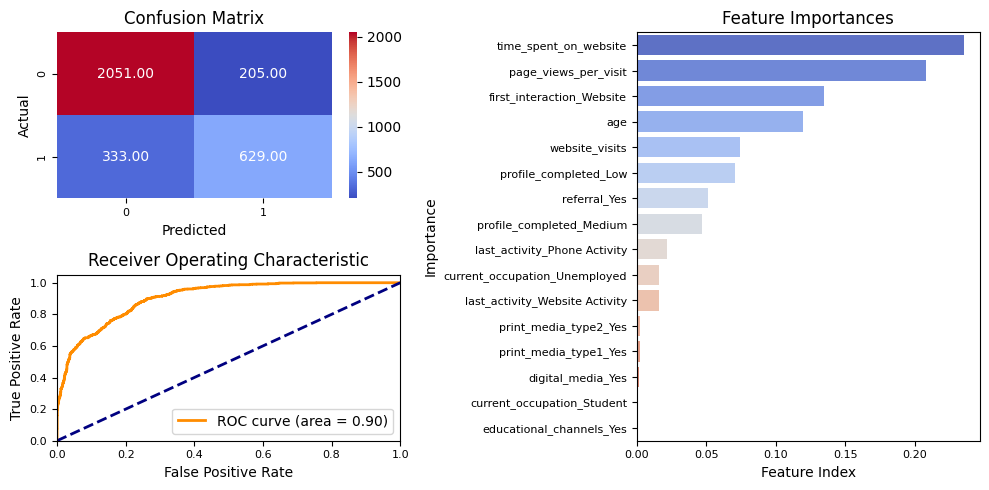

In [53]:
## Checking performance on the training data
y_pred_train_ada_tuned = ada_estimator_tuned.predict(x_train)

#metrics_score('Random Forest - Training Tuned', y_train, y_pred_train_rf_tuned)
ds = utils.evaluate_classification_metrics('ABoost - TRN Tuned', y_train, y_pred_train_ada_tuned, x_train, ada_estimator_tuned)

             Model  Precision   Recall  F1-Score  Accuracy  ROC-AUC
ABoost - TST Tuned   0.758621 0.639225  0.693824  0.831159  0.88882



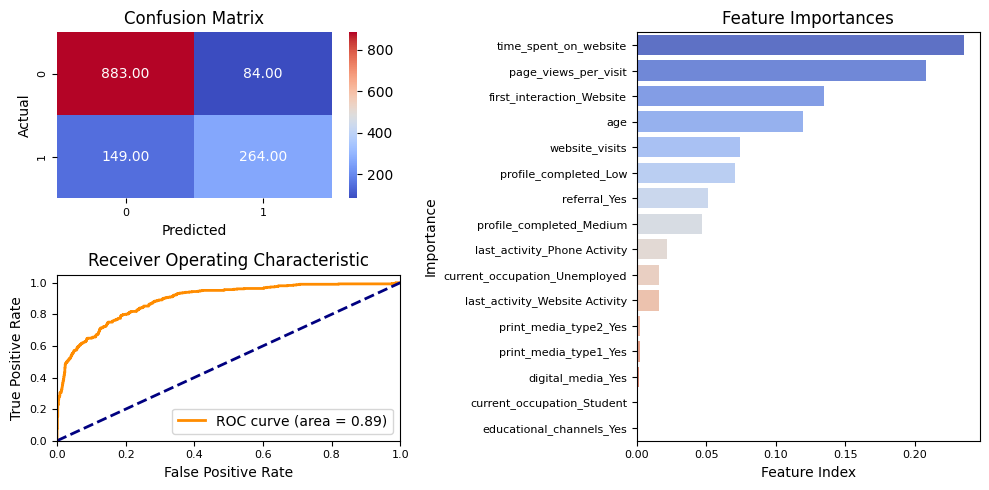

In [54]:
## Checking performance on the training data
y_pred_test_ada_tuned = ada_estimator_tuned.predict(x_test)

#metrics_score('Random Forest - Training Tuned', y_train, y_pred_train_rf_tuned)
ds = utils.evaluate_classification_metrics('ABoost - TST Tuned', y_test, y_pred_test_ada_tuned, x_test, ada_estimator_tuned)

**Observations**
- The model does a does not overfit, all metrics are similiar between the training and test set.
- It does not do a decent job on Recall. 
- The model identifies the time spent on the website, page views per visit, and first interaction as the top 3 most important features.

## Build GBoost Model

In [55]:
# Fitting the Random Forest classifier on the training data
gb_estimator = GradientBoostingClassifier(random_state = 1)

In [56]:
gb_estimator.fit(x_train, y_train)

GradientBoostingClassifier(random_state=1)

               Model  Precision   Recall  F1-Score  Accuracy  ROC-AUC
GBoost - TRN Default    0.81978 0.775468  0.797009  0.881914 0.947207



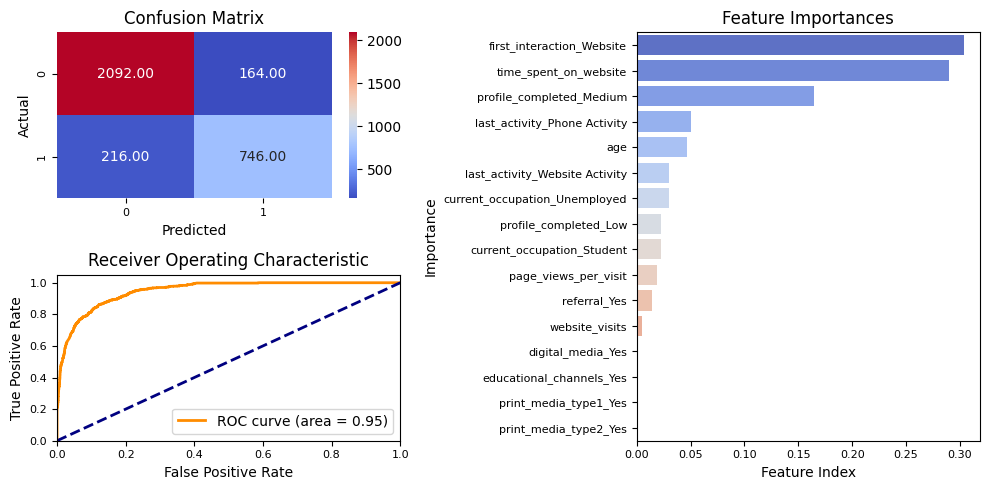

In [57]:
# Checking performance on the training data
y_pred_train_gb = gb_estimator.predict(x_train)

#metrics_score('Random Forest - Training Default', y_train, y_pred_train_rf)
ds = utils.evaluate_classification_metrics('GBoost - TRN Default', y_train, y_pred_train_gb, x_train, gb_estimator)

               Model  Precision   Recall  F1-Score  Accuracy  ROC-AUC
GBoost - TST Default   0.784653 0.767554   0.77601  0.867391 0.928561



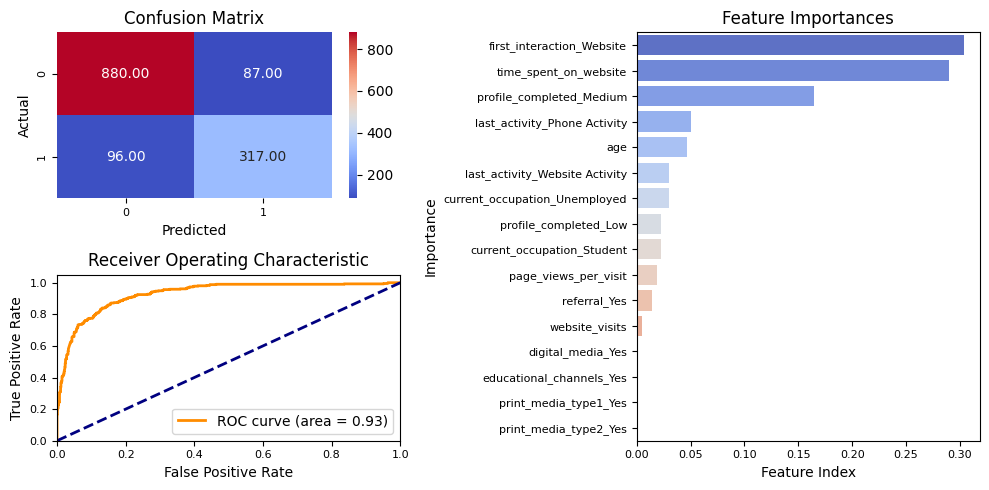

In [58]:
# Checking performance on the training data
y_pred_test_gb = gb_estimator.predict(x_test)

#metrics_score('Random Forest - Training Default', y_train, y_pred_train_rf)
ds = utils.evaluate_classification_metrics('GBoost - TST Default', y_test, y_pred_test_gb, x_test, gb_estimator)

**Observations**
- The model does a does not overfit, all metrics are similiar between the training and test set.
- It does do a decent job on Recall and Accuracy. 
- The model identifies the first interaction, time spent on the website, and medium profile completed as the top 3 most important features.

## GradientBoost Parameter Hyper-Tuning

In [59]:
with parallel_backend(backend='multiprocessing', n_jobs=-1):
        # Choose the type of classifier
        gb_estimator_tuned = GradientBoostingClassifier(random_state = 1)

        # Grid of parameters to choose from
        params_rf = {
                "n_estimators": [100, 250, 500],
                "learning_rate" : [0.01, .1],
                "min_samples_split": [10, 30, 50, 70],
                "max_leaf_nodes": [50, 75, 150, 250],
                "max_features": [0.7, 0.9, 'auto'],
        }


        # Type of scoring used to compare parameter combinations
        scorer = metrics.make_scorer(optimize_on, greater_is_better=True)

        # Run the grid search
        grid_obj = GridSearchCV(gb_estimator_tuned, params_rf, scoring = scorer, cv = 5)

        grid_obj = grid_obj.fit(x_train, y_train)

        # Set the classifier to the best combination of parameters
        gb_estimator_tuned = grid_obj.best_estimator_

In [60]:
gb_estimator_tuned.fit(x_train, y_train)

GradientBoostingClassifier(max_features=0.7, max_leaf_nodes=50,
                           min_samples_split=50, random_state=1)

             Model  Precision   Recall  F1-Score  Accuracy  ROC-AUC
GBoost - TRN Tuned   0.820088 0.772349  0.795503  0.881293 0.944846



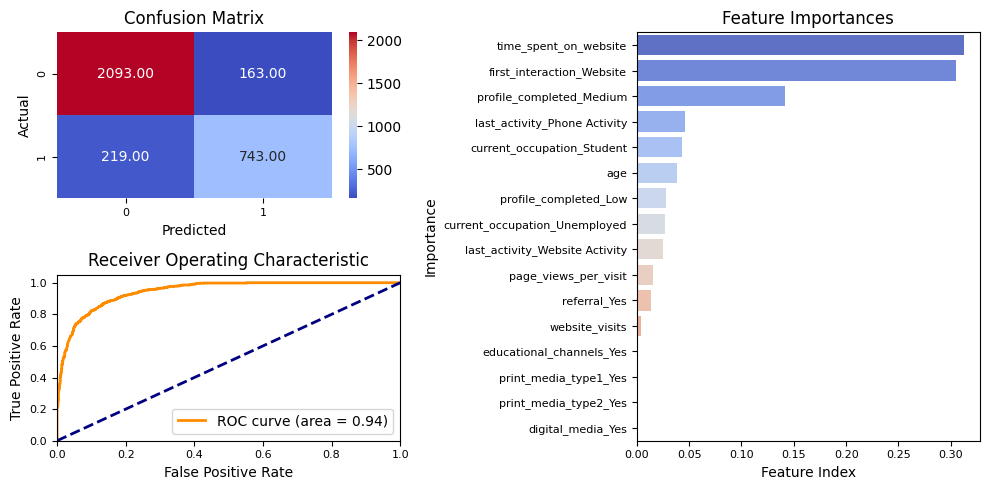

In [61]:
## Checking performance on the training data
y_pred_train_gb_tuned = gb_estimator_tuned.predict(x_train)

#metrics_score('Random Forest - Training Tuned', y_train, y_pred_train_rf_tuned)
ds = utils.evaluate_classification_metrics('GBoost - TRN Tuned', y_train, y_pred_train_gb_tuned, x_train, gb_estimator_tuned)

             Model  Precision   Recall  F1-Score  Accuracy  ROC-AUC
GBoost - TST Tuned       0.79 0.765133  0.777368  0.868841 0.927372



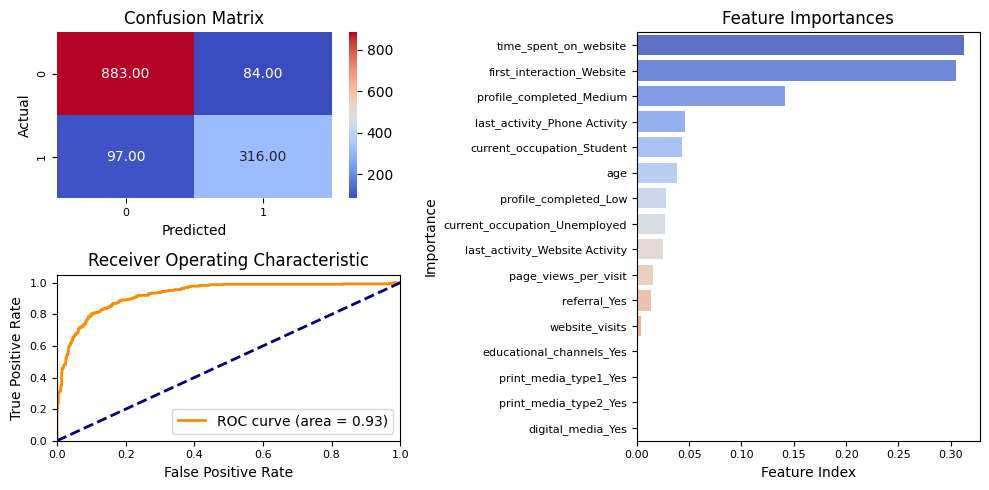

In [62]:
## Checking performance on the training data
y_pred_test_gb_tuned = gb_estimator_tuned.predict(x_test)

#metrics_score('Random Forest - Training Tuned', y_train, y_pred_train_rf_tuned)
ds = utils.evaluate_classification_metrics('GBoost - TST Tuned', y_test, y_pred_test_gb_tuned, x_test, gb_estimator_tuned)

**Observations**
- The model does a does not overfit, all metrics are similiar between the training and test set.
- It does do a decent job on Recall and Accuracy. 
- The model identifies the time spent on the website, first interaction, and medium profile completed as the top 3 most important features.

## Model Selection

In every model the *tuned* model performed better than the default. We will print the metrics out and compare the the tuned models to make a selection.

In [63]:
#print the dataframe with the metrics from all the models with scored test data sets
ds[ds['Model'].str.contains('TST Tuned')].style.background_gradient(cmap='Greens', subset=['Precision','Recall','F1-Score','Accuracy', 'ROC-AUC'], axis=0)

,Model,Precision,Recall,F1-Score,Accuracy,ROC-AUC
3,DTree - TST Tuned,0.684739,0.825666,0.748628,0.834058,0.906397
7,RForest - TST Tuned,0.663082,0.895884,0.762101,0.832609,0.911085
11,ABoost - TST Tuned,0.758621,0.639225,0.693824,0.831159,0.888820
15,GBoost - TST Tuned,0.790000,0.765133,0.777368,0.868841,0.927372


***We will select the Random Forest Tuned model***
- The primary metric ***Recall*** is highest. It has the lowest amount of False Negatives (which has the highest cost). Accuracy is also in the same range as other models.
  - *Note:* the Gradient Boosting model scores the highest in all other metrics except recall. If the use case was just to create a generic model to classify with accuracy, that one would have been choosen.

## Actionable Insights and Recommendations

**Conclusions:**

- A thourough anlysis on a data set provded by ExtraaLearn was performed to identify the leads that might become paying costumers.
- The data analytis shows that 30% of the leads became paying customers. 
- Four modeling techniques are used: Decision Tree, Random Forest, AdaBoost and GradientBoost. In addition, models with default parameters and tuned models are considered.
- The best model is the Tuned Random Forest with the highest Recall score and good accuracy.
- The analysis pointed out that the most important features are those related to the website such as the first interaction, the time spent of the website, profile completion and number of page views per visit.
- The media channels do not have an impact on the conversion rate.

**Recommendations:**
- ExtraaLearn should invest its resources on improving the user experience of the website.
  - The first interaction with the website is the most decisive feature that will make a lead to become a paying customer. Research on making a lead that interacts first with the mobile app to visit the website as well might improve the conversion rate.
  - The time spent on the webiste indicates the interest of the lead to buy the suscription by exploring the content and resources ExtraaLearn provides. Designing the website in such a way that these are easy to find and entertaining will increase the convertion rate.
  - The profile completion also plays a role on lead conversion rate. ExtraaLearn should research on how to make the lead to complete their profiles without blocking to much of the content on the website.
- The ads channels have a very low impact on the conversion rate. 
  - Stop investing on ads on magazines or newspaper or give some special discount if the lead provide some code or something or the sort that are only available in these ads channels.